#### 1. Data Loading and Preprocessing

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Model Accurecy
import seaborn as sns

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")


#### 2. Data Cleaning and Preprocessing

In [123]:
# Load train data to get median and mode
train_df = pd.read_csv("/content/Titanic-Dataset.csv")  # استخدم نفس الملف اللي دربت عليه

# Load original test data
test_df = pd.read_csv("/content/Titanic-Dataset.csv")

# Basic preprocessing
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Encode categorical features
sex_mapping = {'male': 1, 'female': 0}
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

train_df['Sex'] = train_df['Sex'].map(sex_mapping)
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)

# Feature engineering
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
X = train_df[features]
y = train_df['Survived']

### **Models used**
```
1. Linear Models
2. Tree-Based Models
3. Distance-Based Model
4. Kernel-Based Model
```




In [124]:
# ===== Linear Model =====
models["Logistic Regression"] = LogisticRegression(max_iter=200)

# ===== Tree-Based Models =====
models["Random Forest"] = RandomForestClassifier(n_estimators=100, random_state=42)
models["Gradient Boosting"] = GradientBoostingClassifier()

# ===== Distance-Based Model =====
models["K-Nearest Neighbors"] = KNeighborsClassifier(n_neighbors=5)

# ===== Kernel-Based Model =====
models["Support Vector Machine"] = SVC(probability=True)


#### Define models

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}



#### Train and evaluate

In [126]:
# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    acc = accuracy_score(y_valid, preds)
    results[name] = acc
    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_valid, preds))
    print("Classification Report:\n", classification_report(y_valid, preds))



=== Logistic Regression ===
Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


=== Random Forest ===
Accuracy: 0.8156424581005587
Confusion Matrix:
 [[90 15]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179


=== Gradient Boosting ===
Accuracy: 0.8044692737430168
Confusion Matrix:
 [[93 12]
 [23 51]]
Classification Rep

#### Plotting Model Accuracies for Comparison


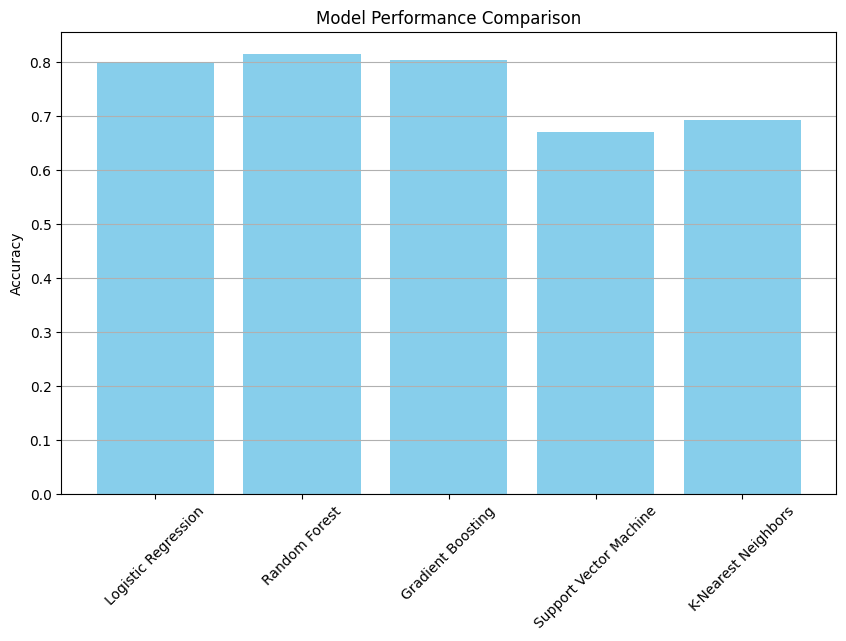

In [127]:
# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Print the dimensions of the data after you've divided it.

In [128]:
print(train_df.shape)
train_df.head()

(891, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1


#### Displaying Training DataFrame Info

In [129]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


####  Generating Statistical Summary of Training Data

In [130]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.361392,1.904602
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,11.000000


#### Checking for Missing Values in Training Data

In [131]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#### Data Cleaning and Handling Missing Values

In [132]:
# Fill missing Age with median
if 'Age' in train_df.columns and train_df['Age'].notnull().sum() > 0:
    train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
if 'Embarked' in train_df.columns and train_df['Embarked'].notnull().sum() > 0:
    train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column
train_df.drop(columns=['Cabin'], inplace=True, errors='ignore')


#### Creating the FamilySize Feature

In [134]:
# Create FamilySize feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1


 #### Encoding Categorical Features (Sex and Embarked)

In [133]:
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])


#### Dropping Irrelevant or Unnecessary Columns from Test Data

In [135]:
test_df = test_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors='ignore')

#### Count of Survivors in the Dataset

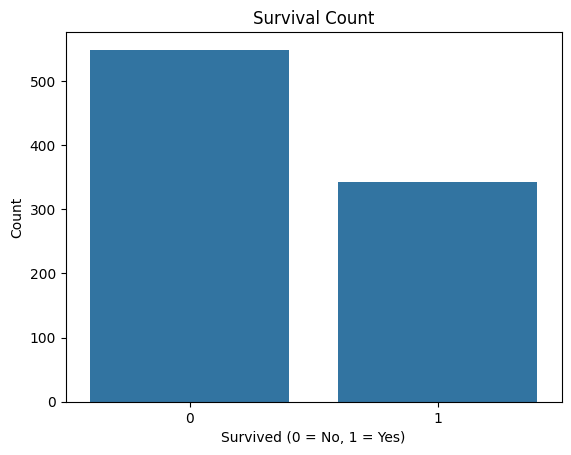

In [136]:
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

#### Age Distribution with KDE Plot

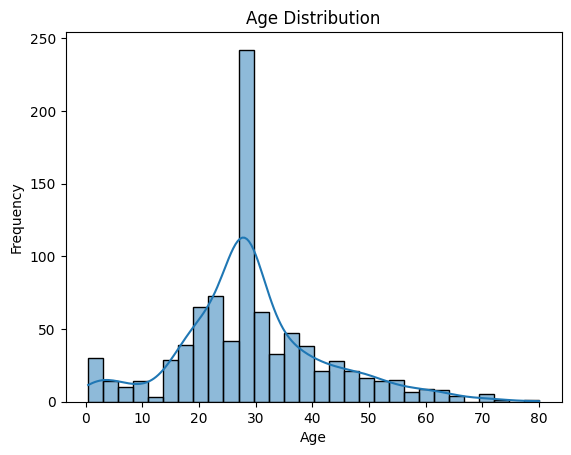

In [137]:
sns.histplot(train_df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

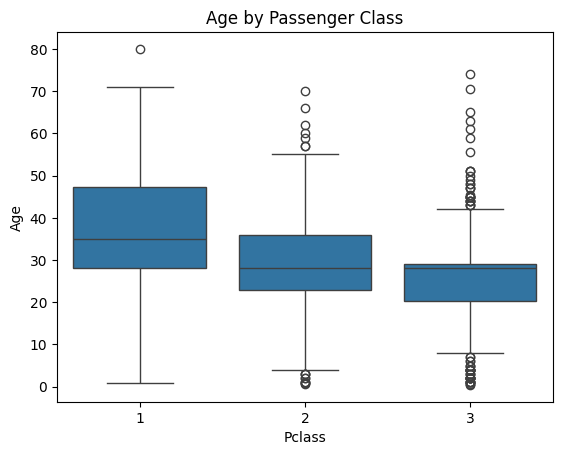

In [138]:
sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title("Age by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.show()

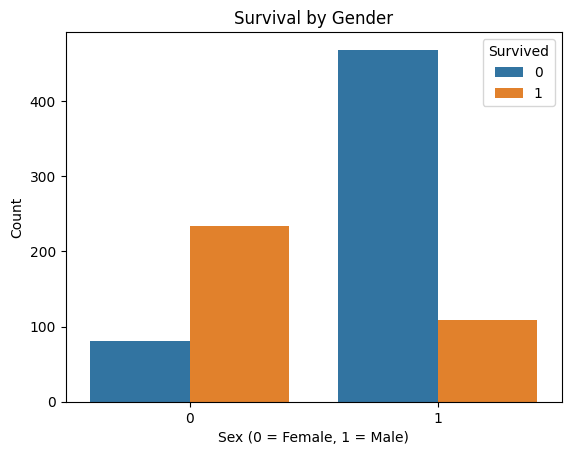

In [139]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title("Survival by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()


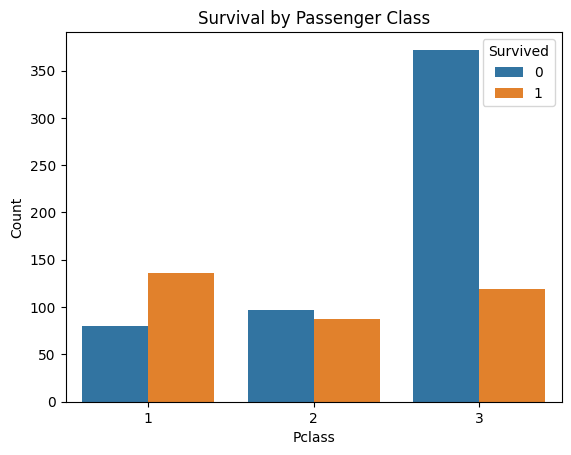

In [140]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title("Survival by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()


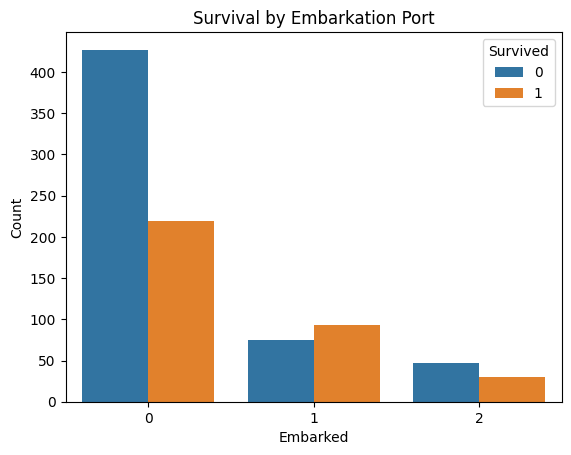

In [141]:
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title("Survival by Embarkation Port")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()


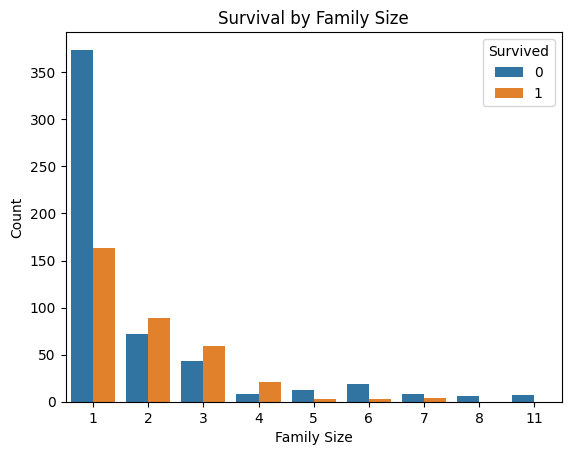

In [142]:
sns.countplot(x='FamilySize', hue='Survived', data=train_df)
plt.title("Survival by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()

In [143]:
# Drop unnecessary columns before training
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']
X = train_df[features]
y = train_df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Training **Logistic Regression Model**

In [144]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

#### **Model Evaluation:** Accuracy, Confusion Matrix, and Classification Report

In [145]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [146]:
# Reload test data
test_final = pd.read_csv("Titanic-Dataset.csv")

# Fill missing values
test_final['Age'].fillna(train_df['Age'].median(), inplace=True)
test_final['Fare'].fillna(train_df['Fare'].median(), inplace=True)
test_final['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables manually
sex_mapping = {'male': 1, 'female': 0}
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

test_final['Sex'] = test_final['Sex'].map(sex_mapping)
test_final['Embarked'] = test_final['Embarked'].map(embarked_mapping)

# Feature engineering
test_final['FamilySize'] = test_final['SibSp'] + test_final['Parch'] + 1

# Final test features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
X_final_test = test_final[features]  # كان هنا غلط بيستخدم test_df بدل test_final

# Train model (if not trained yet)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_df[features], train_df['Survived'])

# Predict
test_preds = model.predict(X_final_test)

# Assuming test_ids is from test_final dataset
test_ids = test_final['PassengerId']

# Save submission file
submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": test_preds
})
submission.to_csv("Titanic-Submission.csv", index=False)
print("Submission file saved as 'Titanic-Submission.csv'")


Submission file saved as 'Titanic-Submission.csv'


In [147]:
# Handle missing values in test set
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Encode test categorical data
le_sex = LabelEncoder()
le_sex.fit(train_df['Sex'])
le_embarked = LabelEncoder()
le_embarked.fit(train_df['Embarked'])

test_df = test_df[test_df['Sex'].isin(le_sex.classes_)]
test_df = test_df[test_df['Embarked'].isin(le_embarked.classes_)]

test_df['Sex'] = le_sex.transform(test_df['Sex'])
test_df['Embarked'] = le_embarked.transform(test_df['Embarked'])

# Drop Survived if it exists
test_df.drop(columns=['Survived'], inplace=True, errors='ignore')


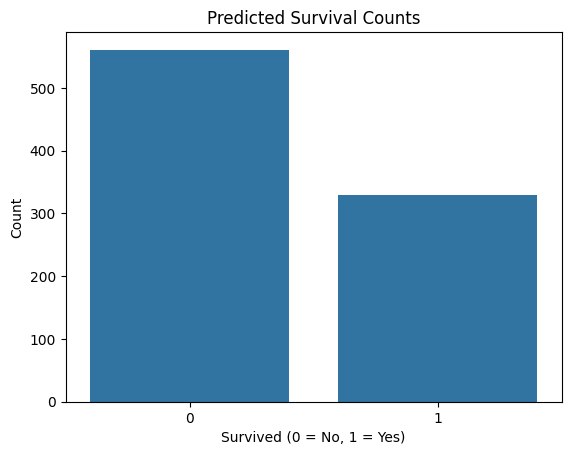

Survival rate in predictions: 37.04%


In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analysis of the number of people predicted to survive versus those who did not survive
sns.countplot(x=test_preds)
plt.title("Predicted Survival Counts")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Survival rate of expectations
survived_percent = (test_preds.sum() / len(test_preds)) * 100
print(f"Survival rate in predictions: {survived_percent:.2f}%")


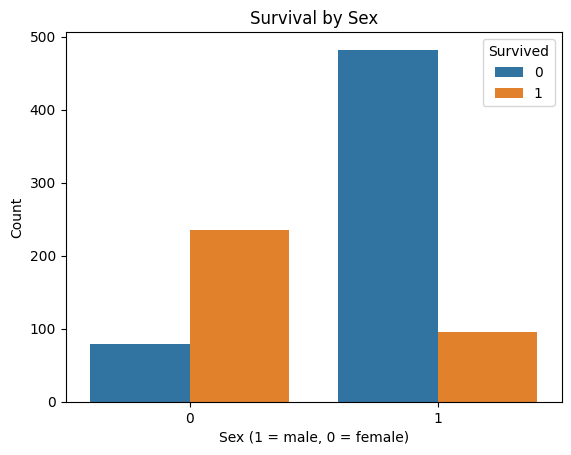

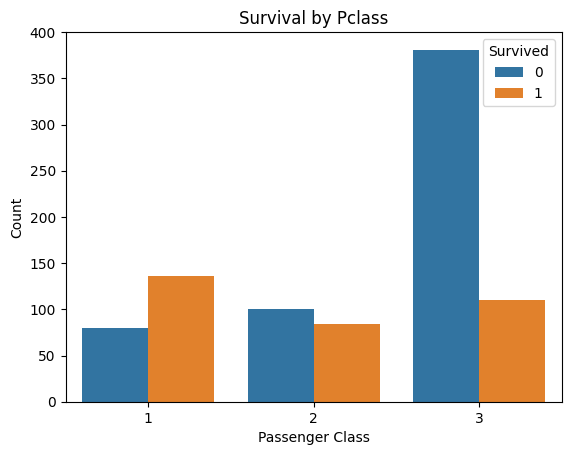

In [149]:
# Add predictions to test_final (مش test_df)
test_final['Survived'] = test_preds

# Survival analysis by gender
sns.countplot(x='Sex', hue='Survived', data=test_final)
plt.title("Survival by Sex")
plt.xlabel("Sex (1 = male, 0 = female)")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()

# Survival analysis by social class
sns.countplot(x='Pclass', hue='Survived', data=test_final)
plt.title("Survival by Pclass")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()
